<a href="https://colab.research.google.com/github/jhportfolio1/MS-AI-School-Python-Azure/blob/main/PythonAzure01_Storage_and_Blob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Python에서 Azure Storage 만들기

## 1) Azure Storage blob 패키지 설치

In [ ]:
!pip install azure-storage-blob azure-identity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

## 2) Blob Services에 접속

- 엑세스 키는 애져 스토리지 안에 액세스 버튼을 누르면 나타난다.

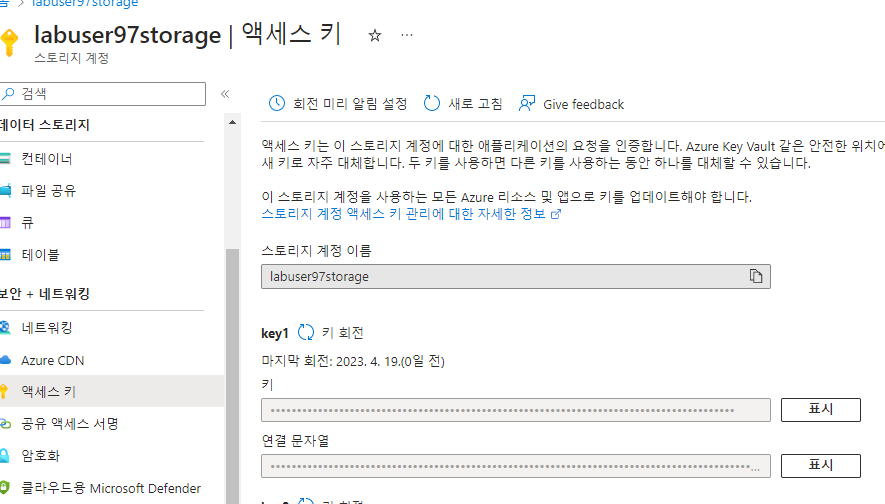

In [ ]:
connect_str = 'DefaultEndpointsProtocol=https;AccountName=labuser97storage;AccountKey=WWqhF+Qjvtrxp/tOJTcc9iRYrwWBWRC//pS3/nRLTQQngOvgWliFi+NjIIXuxsG1+zU69RnSD5wA+AStTPGLWw==;EndpointSuffix=core.windows.net'
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

## 3) 스토리지 내 컨테이너 만들기

In [ ]:
container_name = 'testcontainercolab1'
container_client = blob_service_client.create_container(container_name)

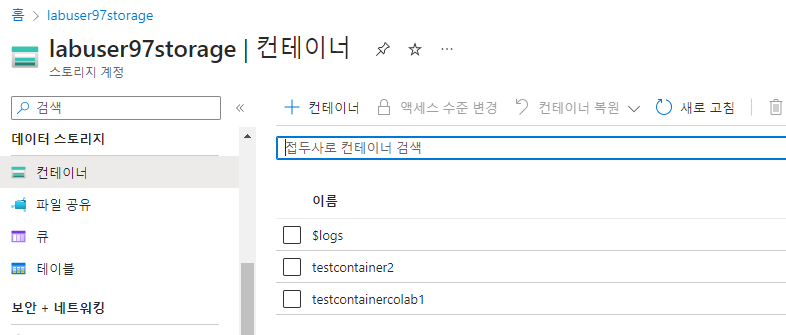

- 위와 같이 스토리지 내 컨테이너가 만들어진다.
- 위의 코드를 두번 실행시키면 에러 발생 : 이미 컨테이너가 있기 때문에

## 4) 코랩 안에 폴더 및 파일 생성
- 폴더명 : data4
- 파일명 : Welcome to Python
- 'w' : 텍스트 형태로 쓰겠다.
- 'r' : 텍스트 형태로 읽겠다.
- 'rb' : 바이너리 형태로 읽겠다. 

In [ ]:
# Create a local directory to hold blob data
local_path = './data'
os.mkdir(local_path)

# Create a file in the local data directory to upload and download
local_file_name = 'welcome' + '.txt'
upload_file_path = os.path.join(local_path, local_file_name)

# Write text to the file
file = open(upload_file_path, mode='w')
file.write('Welcome to Python')
file.close()


FileExistsError: ignored

- Colab 상에서 폴더와 파일이 생겨남

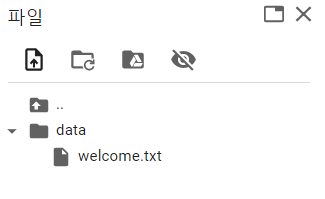

## 5) 생성된 파일을 바이너리 형식으로 연다.

In [ ]:
blob_client = blob_service_client.get_blob_client(container=container_name, blob=local_file_name)

with open(file=upload_file_path, mode='rb') as data:
  blob_client.upload_blob(data)

## 6) Blob 파일의 리스트를 확인한다.

In [ ]:
print('\nListing blobs')

blob_list = container_client.list_blobs()
for blob in blob_list:
  print('\t' + blob.name)


Listing blobs
	welcome.txt


## 7) 코랩(로컬파일)으로 blob 다운받기

- .txt 확장자 앞에 'download'를 붙여서 구분이 가능하도록 한다.(덮어쓰기 방지)
- replace(a, b, c) : a안에서 b를 c로 바꿔라

In [ ]:
download_file_path = os.path.join(local_path, str.replace(local_file_name, '.txt', '_DOWNLOAD.txt'))

In [ ]:
print(download_file_path)

./data/welcome_DOWNLOAD.txt


## 8) 다시 로컬파일로 blob 파일 올리기

In [ ]:
container_client = blob_service_client.get_container_client(container=container_name)

with open(file=download_file_path, mode='wb') as download_file:
  download_file.write(container_client.download_blob(blob.name).readall())

## 9) blob 파일 삭제하기

In [ ]:
#Clean up 

print('\nPress the Enter Key to begin clean up')
if input() == 'yes':

  print('Deleting blob container...')
  container_client.delete_container()

  print('Deleteing the local source and downloaded files....')
  os.remove(upload_file_path)
  os.remove(download_file_path)
  os.rmdir(local_path)

  print('Done')


Press the Enter Key to begin clean up

